In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [4]:
path = './dataset'

In [5]:
train_data = pd.read_csv(path + '/train.csv',encoding='latin-1')

In [6]:
test_data = pd.read_csv(path + '/test.csv',encoding='latin-1')

In [7]:
train_data.describe()

,Message_body,Label
count,975,975
unique,961,2
top,"Sorry, I'll call later",Non-Spam
freq,4,812


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Message_body  975 non-null    object
 1   Label         975 non-null    object
dtypes: object(2)
memory usage: 15.4+ KB


In [9]:
train_data['Label'] = train_data['Label'].replace(['Non-Spam','Spam'],[0,1])

In [10]:
train_data['length'] = train_data.Message_body.apply(len)
test_data['length'] = test_data.Message_body.apply(len)

In [11]:
train_data[:10]

,Message_body,Label,length
0,Rofl. Its true to its name,0,26
1,The guy did some bitching but I acted like i'd...,0,125
2,"Pity, * was in mood for that. So...any other s...",0,57
3,Will ?b going to esplanade fr home?,0,35
4,This is the 2nd time we have tried 2 contact u...,1,159
5,REMINDER FROM O2: To get 2.50 pounds free call...,1,147
6,Huh y lei...,0,12
7,Why don't you wait 'til at least wednesday to ...,0,67
8,Ard 6 like dat lor.,0,19
9,Ok lor... Sony ericsson salesman... I ask shuh...,0,96


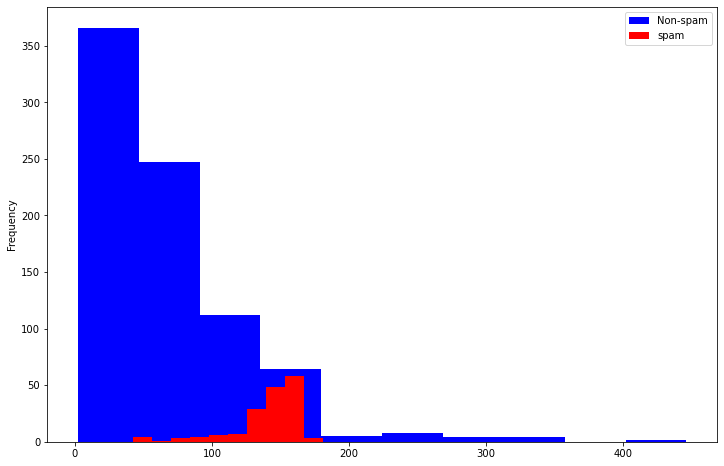

In [12]:
plt.figure(figsize=(12,8))
train_data[train_data.Label==0].length.plot(kind='hist',color='blue',label='Non-spam')
train_data[train_data.Label==1].length.plot(kind='hist',color='red',label='spam')
plt.legend()
plt.show()

In [13]:
import string
from nltk.corpus import stopwords
import nltk

In [14]:
def text_process(mess):
    clean_stopwords = []
    for sw in stopwords.words('english'):
        clean_stopwords.append(''.join([tmp.lower() for tmp in sw if tmp not in string.punctuation]))

    clean = ''.join([tmp.lower() for tmp in mess if tmp not in string.punctuation ])
    clean = ' '.join([tmp for tmp in clean.split() if tmp not in clean_stopwords+['2','ur','4','u','im']])
    
    return clean
    

In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
train_data.Message_body[1]

"The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"

In [17]:
train_data['clean'] = train_data.Message_body.apply(text_process)

In [18]:
train_data['clean'][:10]

0                                       rofl true name
1    guy bitching acted like id interested buying s...
2                          pity mood soany suggestions
3                            b going esplanade fr home
4    2nd time tried contact 50 pound prize claim ea...
5    reminder o2 get 250 pounds free call credit de...
6                                              huh lei
7                     wait til least wednesday see get
8                                   ard 6 like dat lor
9    ok lor sony ericsson salesman ask shuhui say q...
Name: clean, dtype: object

In [19]:
test_data['clean'] = test_data.Message_body.apply(text_process)

In [20]:
test_data['clean'][:10]

0    rcv msgs chat svc free hardcore services text ...
1    want get laid tonight want real dogging locati...
2    sunshine quiz wkly q win top sony dvd player k...
3    todays voda numbers ending 7548 selected recei...
4    urgent mobile awarded 000 bonus caller prize 5...
5    private 2004 account statement 07742676969 sho...
6    winner specially selected receive 000 holiday ...
7    gent trying contact last weekends draw shows 0...
8    please call customer service representative 08...
9             hear new divorce barbie comes kens stuff
Name: clean, dtype: object

In [21]:
from collections import Counter

train_nospam_words = train_data[train_data.Label==0].clean.apply(lambda x: [word.lower() for word in x.split()])
train_spam_words = train_data[train_data.Label==1].clean.apply(lambda x: [word.lower() for word in x.split()])

nospam_train = Counter()
spam_train = Counter()
for tmp in train_nospam_words:
    nospam_train.update(tmp)
for tmp in train_spam_words:
    spam_train.update(tmp)

print(nospam_train.most_common(50))
print('\n')
print(spam_train.most_common(50))





[('get', 50), ('go', 48), ('ok', 41), ('call', 41), ('ltgt', 39), ('know', 37), ('like', 35), ('day', 35), ('good', 33), ('got', 32), ('oh', 32), ('come', 31), ('home', 30), ('one', 30), ('time', 30), ('want', 30), ('later', 29), ('ill', 28), ('back', 28), ('see', 27), ('need', 26), ('going', 25), ('lor', 25), ('tell', 25), ('love', 24), ('pls', 24), ('well', 23), ('still', 22), ('hey', 22), ('cant', 21), ('give', 21), ('r', 20), ('take', 20), ('today', 20), ('sorry', 19), ('thats', 19), ('da', 19), ('ask', 18), ('anything', 18), ('think', 18), ('hi', 18), ('work', 18), ('make', 18), ('phone', 18), ('n', 18), ('week', 17), ('great', 17), ('yeah', 17), ('send', 17), ('face', 17)]


[('call', 86), ('free', 53), ('stop', 34), ('mobile', 33), ('txt', 29), ('claim', 27), ('text', 26), ('000', 24), ('reply', 21), ('prize', 20), ('get', 19), ('00', 17), ('cash', 17), ('send', 16), ('50', 15), ('guaranteed', 15), ('customer', 15), ('contact', 13), ('urgent', 13), ('latest', 13), ('service', 13

In [22]:
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [23]:
train_data['clean_stemm'] = train_data['clean'].apply(stemm_text)
test_data['clean_stemm'] = test_data['clean'].apply(stemm_text)
print(train_data.head())
print(test_data.head())

                                        Message_body  Label  length  \
0                         Rofl. Its true to its name      0      26   
1  The guy did some bitching but I acted like i'd...      0     125   
2  Pity, * was in mood for that. So...any other s...      0      57   
3                Will ?b going to esplanade fr home?      0      35   
4  This is the 2nd time we have tried 2 contact u...      1     159   

                                               clean  \
0                                     rofl true name   
1  guy bitching acted like id interested buying s...   
2                        pity mood soany suggestions   
3                          b going esplanade fr home   
4  2nd time tried contact 50 pound prize claim ea...   

                                         clean_stemm  
0                                     rofl true name  
1  guy bitch act like id interest buy someth els ...  
2                            piti mood soani suggest  
3               

In [24]:
def preprocess(text):
    clean_stopwords = []
    for sw in stopwords.words('english'):
        clean_stopwords.append(''.join([tmp.lower() for tmp in sw if tmp not in string.punctuation]))

    clean = ''.join([tmp.lower() for tmp in text if tmp not in string.punctuation ])
    clean = ' '.join([tmp for tmp in clean.split() if tmp not in clean_stopwords+['2','ur','4','u','im']])
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [25]:
train_data.clean_stemm = train_data.clean_stemm.apply(preprocess)
test_data.clean_stemm = test_data.clean_stemm.apply(preprocess)

In [26]:
from sklearn.model_selection import train_test_split

x = train_data.clean_stemm
y = train_data.Label
print(x.shape)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=100)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(975,)
(975,)
(731,)
(731,)
(244,)
(244,)


In [27]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(x_train)
sequences = tok.texts_to_sequences(x_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [28]:
from tensorflow.keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
model = Sequential()
model.add(Embedding(max_words,50,input_length=max_len))
model.add(LSTM(64))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Dropout(0.7))
model.add(Dense(1,name='outLayer'))
model.add(Activation('sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 50)           50000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               16640     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
outLayer (Dense)             (None, 1)                 257       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0

In [29]:
from keras.optimizers import Adam
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999),metrics=['accuracy'])

In [30]:
model.fit(sequences_matrix,y_train,batch_size=128,epochs=20,validation_split=0.2)

Epoch 1/20
5/5 [==============================] - 9s 2s/step - loss: 0.6724 - accuracy: 0.7483 - val_loss: 0.6215 - val_accuracy: 0.8435
Epoch 2/20
5/5 [==============================] - 3s 628ms/step - loss: 0.5821 - accuracy: 0.8219 - val_loss: 0.4556 - val_accuracy: 0.8435
Epoch 3/20
5/5 [==============================] - 3s 590ms/step - loss: 0.4521 - accuracy: 0.8219 - val_loss: 0.3792 - val_accuracy: 0.8435
Epoch 4/20
5/5 [==============================] - 2s 469ms/step - loss: 0.3886 - accuracy: 0.8219 - val_loss: 0.3424 - val_accuracy: 0.8435
Epoch 5/20
5/5 [==============================] - 4s 834ms/step - loss: 0.3444 - accuracy: 0.8219 - val_loss: 0.2974 - val_accuracy: 0.8435
Epoch 6/20
5/5 [==============================] - 5s 970ms/step - loss: 0.2902 - accuracy: 0.8219 - val_loss: 0.2391 - val_accuracy: 0.8435
Epoch 7/20
5/5 [==============================] - 3s 655ms/step - loss: 0.2327 - accuracy: 0.8305 - val_loss: 0.1977 - val_accuracy: 0.8844
Epoch 8/20
5/5 [=======

In [31]:
test_sequences = tok.texts_to_sequences(x_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [32]:
loss,accu = model.evaluate(test_sequences_matrix,y_test)
print(f'loss: {loss}, accuracy: {accu}')

8/8 [==============================] - 0s 54ms/step - loss: 0.1076 - accuracy: 0.9795
loss: 0.1076073944568634, accuracy: 0.9795082211494446


In [115]:
'''
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.fit_transform(x_test)
pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())
test_dtm = vect.transform(test_data.Message_body)
test_dtm.toarray()
pd.DataFrame(test_dtm.toarray(), columns=vect.get_feature_names())
'''

'\nfrom sklearn.feature_extraction.text import CountVectorizer\nvect = CountVectorizer()\nx_train_dtm = vect.fit_transform(x_train)\nx_test_dtm = vect.fit_transform(x_test)\npd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())\ntest_dtm = vect.transform(test_data.Message_body)\ntest_dtm.toarray()\npd.DataFrame(test_dtm.toarray(), columns=vect.get_feature_names())\n'

In [33]:
X = test_data.clean_stemm
test_seq = tok.texts_to_sequences(X)
print(test_seq)

[[334, 4, 67, 11, 2, 3, 526, 296, 485, 918, 225, 42], [13, 3, 68, 13, 353, 174, 813, 833, 295, 602, 353, 225, 239, 543], [811, 252, 76, 654, 492, 18, 14, 74], [38, 626, 35, 167, 139, 108, 51, 448, 54, 1, 627, 628, 19, 120, 629, 258], [116, 10, 51, 36, 658, 52, 432, 42, 60, 1, 249, 250], [268, 462, 192, 269, 81, 270, 658, 219, 19, 1, 271, 120, 220], [548, 284, 139, 108, 36, 155, 887, 407, 251, 194, 389, 19, 233], [42, 60, 111, 156, 165, 81, 36, 52, 85, 1, 19, 120, 283, 362, 250], [54, 1, 44, 67, 409, 468, 85, 36, 49, 36, 52], [190, 86, 7, 133], [116, 51, 257, 36, 19, 14, 801], [884, 44, 54, 314, 576, 833, 51, 240, 658, 52, 1], [348, 112, 307, 284, 1, 224, 567, 4, 193], [196, 86, 227, 588, 167, 28, 167], [110, 42, 1, 28, 196, 4, 138, 10, 4, 831, 54, 1, 482, 208, 96], [178, 574, 211, 602, 10, 289, 354, 54, 28, 89, 28, 289], [417, 567, 193, 394, 14, 724, 417, 115], [114, 757, 787, 360, 162, 14, 99], [116, 112, 16, 4, 52, 14, 379, 19, 176, 440], [349, 76, 49, 259, 199, 14, 23, 310, 115, 188

In [34]:
test_seq = sequence.pad_sequences(test_seq, maxlen=max_len)
print(test_seq)

[[  0   0   0 ... 918 225  42]
 [  0   0   0 ... 225 239 543]
 [  0   0   0 ...  18  14  74]
 ...
 [  0   0   0 ...  62 144  41]
 [  0   0   0 ...  73  24 228]
 [  0   0   0 ...   0 788 184]]


In [35]:
pred = model.predict(test_seq)
print(pred)

[[9.98531878e-01]
 [9.33202922e-01]
 [9.95931804e-01]
 [9.99955773e-01]
 [9.99831319e-01]
 [9.99975681e-01]
 [9.99901175e-01]
 [9.99981999e-01]
 [9.99980807e-01]
 [8.44448805e-04]
 [9.95930433e-01]
 [9.99908864e-01]
 [9.98947084e-01]
 [9.16319788e-01]
 [9.99768257e-01]
 [9.99102473e-01]
 [9.99283791e-01]
 [9.87997174e-01]
 [9.99918342e-01]
 [9.99969721e-01]
 [9.99955952e-01]
 [9.99970436e-01]
 [1.45655274e-02]
 [9.99873877e-01]
 [6.64688414e-05]
 [2.11440623e-02]
 [4.00389035e-05]
 [1.22106867e-05]
 [1.19486451e-03]
 [2.98315287e-03]
 [5.77989376e-05]
 [1.37030229e-05]
 [9.98607635e-01]
 [8.85277987e-04]
 [4.45945263e-02]
 [4.33453170e-06]
 [2.39348412e-03]
 [7.29292631e-04]
 [4.81545925e-04]
 [2.11959668e-05]
 [1.66475773e-04]
 [2.28226185e-04]
 [9.99985695e-01]
 [1.07614389e-04]
 [1.03381753e-04]
 [5.62251080e-05]
 [1.53804303e-05]
 [6.03502393e-01]
 [4.81963158e-04]
 [3.38852406e-04]
 [9.48406637e-01]
 [2.02745199e-04]
 [4.23224901e-06]
 [3.12592056e-05]
 [1.10757351e-03]
 [9.999566

In [36]:
y_preds = (model.predict(test_seq) > 0.5).astype("int32")
print(y_preds)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [125]:
print(len(y_preds[y_preds==0]))
print(len(y_preds[y_preds==1]))

78
29


In [126]:
print(len(y_preds))

107


In [127]:
print(len(test_data))

107


In [38]:
sub = pd.DataFrame(y_preds,columns=['prediction'])
sub.to_csv('이보림_Adv_solution.csv')

In [39]:
sub

,prediction
0,1
1,1
2,1
3,1
4,1
...,...
102,0
103,0
104,0
105,0
